In [8]:
# Load the dataset
import h5py
svhn_data = h5py.File('SVHN_single_grey1.h5', 'r')

In [9]:
# copy all the sets into different variables
X_train = svhn_data['X_train'][:]
X_test = svhn_data['X_test'][:]
X_val = svhn_data['X_val'][:]
y_val = svhn_data['y_val'][:]
y_test = svhn_data['y_test'][:]
y_train = svhn_data['y_train'][:]

In [10]:
# print the shape of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(60000, 32, 32)
(60000,)
(18000, 32, 32)
(18000,)


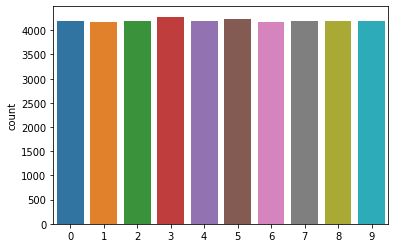

In [14]:
# Lets plot the y variable to study that are there enough images in each category.
import seaborn as sns
sns.countplot(y_train)
# the number of samples for each of the numbers are almost same
# So the data is good to train

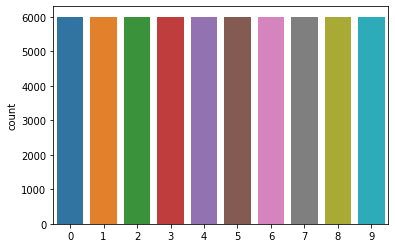

In [12]:
# Lets check with validation set whether the number of samples for each number is good enought to validate
sns.countplot(y_val)
# yes again here also we have the equal sample for each number to validate

In [15]:
# we need to categorise the y variable to fit the data
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

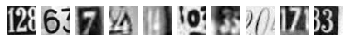

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [39]:
# lets print the images and understand their labels
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i, :], cmap="gray")
    plt.axis("off")
plt.show()
print(y_train[0:10,])

In [16]:
# lets normalize the data
X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

In [9]:
# so we have 3 sets of data i.e, train/val/test split
# we have 42000 train set
# 60000 validation set
# and 18000 test set

In [3]:
# Building the nueral network in Sequential
# Importing the necessary libraries to build the nueral network
# Building neural network with keras library with tensorflow backend
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape

In [11]:
tf.keras.backend.clear_session()
# Lets build the neural network
svhn_model = Sequential()
# input layer
svhn_model.add(Reshape((1024,), input_shape=(32,32,)))
svhn_model.add(BatchNormalization())

# Lets try with ReLu activation layer in the hidden layers and normalize after every hidden layers
# 1st hidden layer
svhn_model.add(Dense(392, activation='relu'))
svhn_model.add(BatchNormalization())
# 2nd hidden layer
svhn_model.add(Dense(196, activation='relu'))
svhn_model.add(BatchNormalization())
#3rd hidden layer
svhn_model.add(Dense(98, activation='relu'))
svhn_model.add(BatchNormalization())
# 4th hidden layer
svhn_model.add(Dense(49, activation='relu'))
svhn_model.add(BatchNormalization())
# 5th hidden layer
svhn_model.add(Dense(25, activation='relu'))
svhn_model.add(BatchNormalization())
# Output layer with softmax activation layer
svhn_model.add(Dense(10, activation='softmax'))

In [12]:
# we are going to compile the model with Stockastic gradient descent model 
# with learning rate 0.01 and momentum 0.9
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
svhn_model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy', 'mse'])

In [13]:
# lets train and validate the model and get the accuracy with 10 epochs
svhn_model.fit(X_train, y_train, batch_size=200, epochs=10, validation_data=(X_val, y_val))

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 194us/sample - loss: 1.6301 - accuracy: 0.4551 - mse: 0.0673 - val_loss: 1.3951 - val_accuracy: 0.5813 - val_mse: 0.0591
Epoch 2/10
42000/42000 [==============================] - 5s 122us/sample - loss: 1.0340 - accuracy: 0.6708 - mse: 0.0439 - val_loss: 0.9308 - val_accuracy: 0.7038 - val_mse: 0.0396
Epoch 3/10
42000/42000 [==============================] - 5s 125us/sample - loss: 0.8677 - accuracy: 0.7274 - mse: 0.0370 - val_loss: 0.8052 - val_accuracy: 0.7446 - val_mse: 0.0344
Epoch 4/10
42000/42000 [==============================] - 5s 126us/sample - loss: 0.7508 - accuracy: 0.7630 - mse: 0.0324 - val_loss: 0.7327 - val_accuracy: 0.7702 - val_mse: 0.0315
Epoch 5/10
42000/42000 [==============================] - 6s 133us/sample - loss: 0.6897 - accuracy: 0.7814 - mse: 0.0299 - val_loss: 0.6491 - val_accuracy: 0.7961 - val_mse: 0.0281
Epoch 6/10
42000/42000 [================

In [14]:
# from the above model we are getting the accuracy to 85% and loss is at still higher side that is 48% so we still need to imrove the model

In [14]:
# Lets try tuning SGD Model
sgd = SGD(learning_rate=0.1, momentum=0.9, nesterov=False)
svhn_model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy', 'mse'])

In [15]:
# This time we try with 100 epochs
model_info = svhn_model.fit(X_train, y_train, batch_size=200, epochs=100, validation_data=(X_val, y_val))

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 11s 265us/sample - loss: 0.9191 - accuracy: 0.7043 - mse: 0.0396 - val_loss: 0.8373 - val_accuracy: 0.7452 - val_mse: 0.0355
Epoch 2/100
42000/42000 [==============================] - 6s 149us/sample - loss: 0.7000 - accuracy: 0.7783 - mse: 0.0305 - val_loss: 0.6127 - val_accuracy: 0.8084 - val_mse: 0.0267
Epoch 3/100
42000/42000 [==============================] - 6s 152us/sample - loss: 0.6111 - accuracy: 0.8080 - mse: 0.0267 - val_loss: 0.5586 - val_accuracy: 0.8264 - val_mse: 0.0243
Epoch 4/100
42000/42000 [==============================] - 6s 148us/sample - loss: 0.5554 - accuracy: 0.8225 - mse: 0.0244 - val_loss: 0.5324 - val_accuracy: 0.8326 - val_mse: 0.0233
Epoch 5/100
42000/42000 [==============================] - 6s 149us/sample - loss: 0.5186 - accuracy: 0.8355 - mse: 0.0228 - val_loss: 0.4959 - val_accuracy: 0.8469 - val_mse: 0.0216
Epoch 6/100
42000/42000 [=========

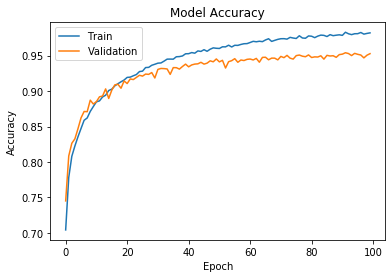

In [16]:
# lets plot the accuracy and loss
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

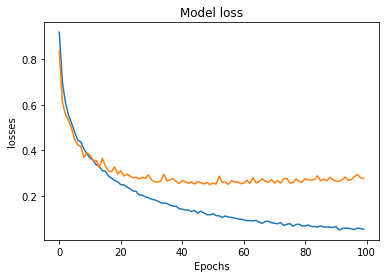

In [17]:
# lets plot the loss plot to understand loss during validation and training
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.show()
# so now we can see that loss during training is went really low(minima) that is very good
# but during validation the loss is still not reaching to its botto(minima).
# we can still improve the model performance by tweeking few hyper parameters

In [23]:
from tensorflow.keras.layers import Dropout
tf.keras.backend.clear_session()
# Lets build the model again with different hidden layers and implement the dropout layers for each respective layers
svhn_model = Sequential()
# input layer
svhn_model.add(Reshape((1024,), input_shape=(32,32,)))

# Lets try with ReLu activation layer in the hidden layers
# 1st hidden layer
svhn_model.add(Dense(392, activation='relu'))
# implementing the dropout with rate of 0.3 and noise shape with batch_size and input shape
svhn_model.add(Dropout(rate=0.2, noise_shape=(None, 392)))

# 2nd hidden layer
svhn_model.add(Dense(196, activation='relu'))
svhn_model.add(Dropout(rate=0.2, noise_shape=(None, 196)))

# 3rd hidden layer
svhn_model.add(Dense(98, activation='relu'))
svhn_model.add(Dropout(rate=0.2, noise_shape=(None, 98)))

# 4th hidden layer
svhn_model.add(Dense(49, activation='relu'))
svhn_model.add(Dropout(rate=0.2, noise_shape=(None, 49)))

# 5th hidden layer
svhn_model.add(Dense(25, activation='relu'))
svhn_model.add(Dropout(rate=0.2, noise_shape=(None, 25)))

# Output layer with softmax activation layer
svhn_model.add(Dense(10, activation='softmax'))

In [24]:
# we still implement the sgd optimizer to test whether we overtake the above model
sgd = SGD(learning_rate=0.01, momentum=0.92, nesterov=False)
svhn_model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy', 'mse'])

In [28]:
# This time we try with 100 epochs
model_info = svhn_model.fit(X_train, y_train, batch_size=200, epochs=100, validation_data=(X_val, y_val))

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 54us/sample - loss: 2.3062 - accuracy: 0.1018 - mse: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.1019 - val_mse: 0.0900
Epoch 2/100
42000/42000 [==============================] - 2s 45us/sample - loss: 2.3021 - accuracy: 0.1058 - mse: 0.0900 - val_loss: 2.2981 - val_accuracy: 0.1156 - val_mse: 0.0899
Epoch 3/100
42000/42000 [==============================] - 2s 41us/sample - loss: 2.2921 - accuracy: 0.1199 - mse: 0.0898 - val_loss: 2.2556 - val_accuracy: 0.1888 - val_mse: 0.0889
Epoch 4/100
42000/42000 [==============================] - 2s 40us/sample - loss: 2.2180 - accuracy: 0.1668 - mse: 0.0880 - val_loss: 2.0920 - val_accuracy: 0.2173 - val_mse: 0.0848
Epoch 5/100
42000/42000 [==============================] - 2s 39us/sample - loss: 2.0861 - accuracy: 0.2213 - mse: 0.0848 - val_loss: 1.9255 - val_accuracy: 0.3034 - val_mse: 0.0806
Epoch 6/100
42000/42000 [===============

In [ ]:
# From the above model we can see that we recieved very less val accuracy 

In [41]:
tf.keras.backend.clear_session()
# Lets build the model again with different hidden layers and user weight initialization with he_normal
svhn_model = Sequential()
# input layer
svhn_model.add(Reshape((1024,), input_shape=(32,32,)))
svhn_model.add(BatchNormalization())

# Lets try with ReLu activation layer in the hidden layers and normalize after every hidden layers
# 1st hidden layer
svhn_model.add(Dense(392, activation='relu', kernel_initializer='he_normal'))
svhn_model.add(BatchNormalization())

# 2nd hidden layer
svhn_model.add(Dense(196, activation='relu',kernel_initializer='he_normal'))
svhn_model.add(BatchNormalization())

# 3rd hidden layer
svhn_model.add(Dense(98, activation='relu', kernel_initializer='he_normal'))
svhn_model.add(BatchNormalization())

# 4th hidden layer
svhn_model.add(Dense(49, activation='relu', kernel_initializer='he_normal'))
svhn_model.add(BatchNormalization())

# 5th hidden layer
svhn_model.add(Dense(25, activation='relu', kernel_initializer='he_normal'))
svhn_model.add(BatchNormalization())

# Output layer with softmax activation layer
svhn_model.add(Dense(10, activation='softmax'))

In [42]:
# lets try with adam optimizer
adam = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.99)
svhn_model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['accuracy', 'mse'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
model_info = svhn_model.fit(X_train, y_train, batch_size=200, epochs=100, validation_data=(X_val, y_val))

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 103us/sample - loss: 1.6455 - accuracy: 0.4156 - mse: 0.0692 - val_loss: 1.4611 - val_accuracy: 0.5156 - val_mse: 0.0628
Epoch 2/100
42000/42000 [==============================] - 3s 66us/sample - loss: 0.9983 - accuracy: 0.6809 - mse: 0.0428 - val_loss: 0.8678 - val_accuracy: 0.7301 - val_mse: 0.0370
Epoch 3/100
42000/42000 [==============================] - 3s 66us/sample - loss: 0.7941 - accuracy: 0.7505 - mse: 0.0342 - val_loss: 0.7216 - val_accuracy: 0.7753 - val_mse: 0.0310
Epoch 4/100
42000/42000 [==============================] - 3s 67us/sample - loss: 0.6876 - accuracy: 0.7815 - mse: 0.0299 - val_loss: 0.6520 - val_accuracy: 0.7992 - val_mse: 0.0281
Epoch 5/100
42000/42000 [==============================] - 3s 65us/sample - loss: 0.6186 - accuracy: 0.8066 - mse: 0.0269 - val_loss: 0.6607 - val_accuracy: 0.7946 - val_mse: 0.0286
Epoch 6/100
42000/42000 [==============

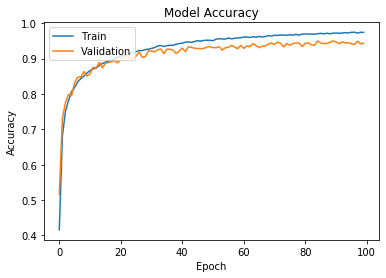

In [44]:
# lets plot the accuracy and loss
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# model accuracy is still low but we are not overfitting the data. The model validation is better than training.

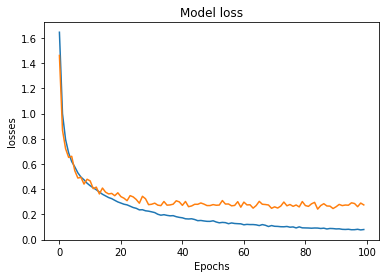

In [45]:
# lets plot the loss plot to understand loss during validation and training
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.show()
# so from the above model we are leading to very good results our validaation loss is really went down and it is doing better than training

In [46]:
test_info = svhn_model.evaluate(X_test, y_test, batch_size = None, use_multiprocessing=True)

18000/18000 [==============================] - 1s 53us/sample - loss: 0.7912 - accuracy: 0.8541 - mse: 0.0235


In [47]:
# lets print the loss and accuracy of the test sample
print('loss of the test samples: %s', test_info[0])
print('accucy of the test sample: %s', test_info[1])

loss of the test samples: %s 0.7912383183315397
accucy of the test sample: %s 0.85411114


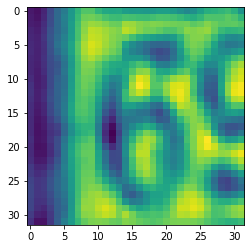

In [48]:
plt.imshow(X_test[11934, :])

In [49]:
labels = svhn_model.predict(X_test[11934, :].reshape((1,32,32)))

In [50]:
import numpy as np
np.argmax(labels)

6

In [ ]:
# We have trained and validated with many methods above
# The one which really did well in accuracy on validation set as well is 
# having 97% accuracy training accuracy and 95% on validation
# and loss really went down to 0.07% in training and 2.4% loss in validation
# which the model is having 6 layers with relu activation and h_normal weight initialization, 5 batch normalization layers.
# Adam optimizer is used to minimize the loss with 0.01 learning rate and beta1 as 0.9 and beta2 as 0.99.

# we can see all the deatail below of the best fit model.

In [54]:
# Printing the loss and accuracy of the model.
print("Training Accuracy of the model", np.max(model_info.history["accuracy"]))
print("Training Loss of the model", np.min(model_info.history["loss"]))
print("Validation Accuracy of the model", np.max(model_info.history["val_accuracy"]))
print("Validation Loss of the model", np.min(model_info.history["val_loss"]))

Training Accuracy of the model 0.9743095
Training Loss of the model 0.07637902782963855
Validation Accuracy of the model 0.9498
Validation Loss of the model 0.24155773103858033


In [56]:
# summary of the model
svhn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 392)               401800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 392)               1568      
_________________________________________________________________
dense_1 (Dense)              (None, 196)               77028     
_________________________________________________________________
batch_normalization_2 (Batch (None, 196)               784       
_________________________________________________________________
dense_2 (Dense)              (None, 98)                1

In [55]:
# configuaration of adam classifier
svhn_model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.01,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.99,
 'epsilon': 1e-07,
 'amsgrad': False}